#Multiple Linear Regression


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


EDA

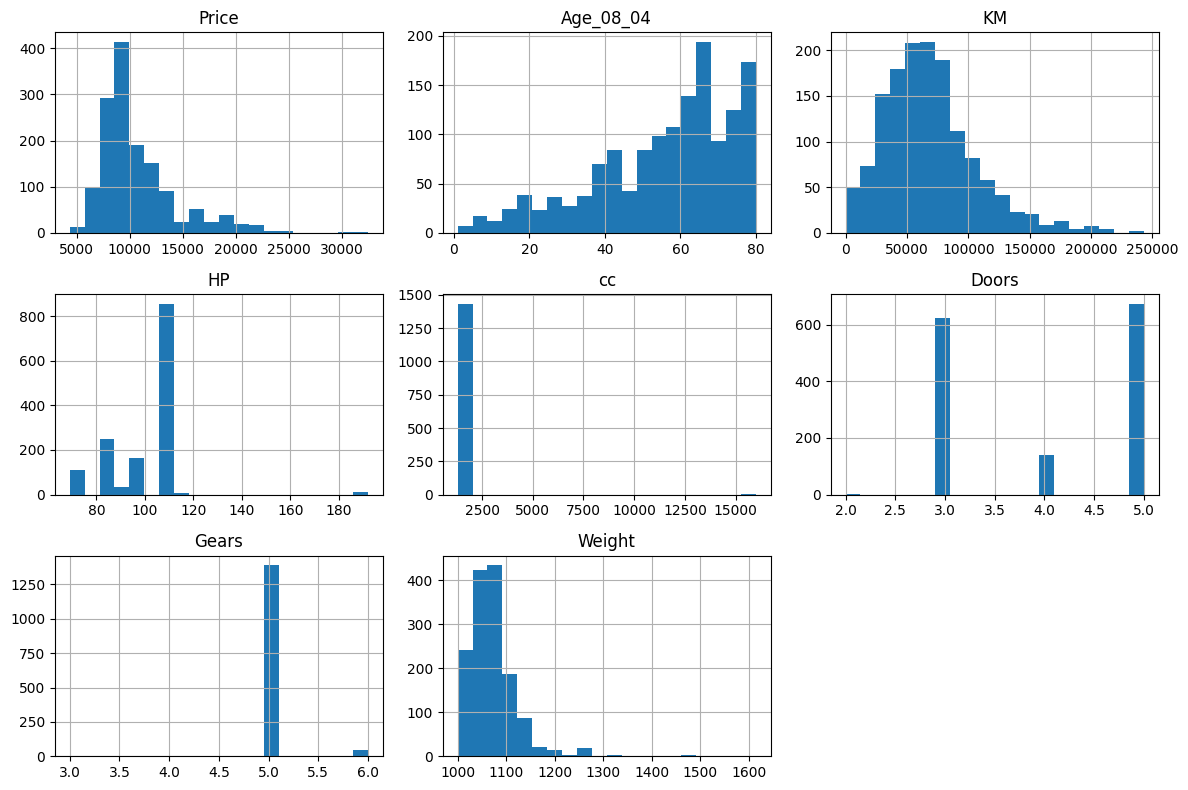

In [3]:
import matplotlib.pyplot as plt

# Select continuous variables
continuous_vars = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']

# Plot histograms for continuous variables
df[continuous_vars].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

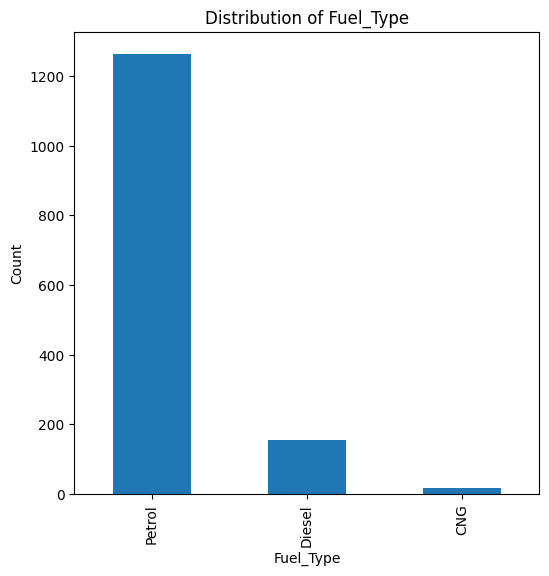

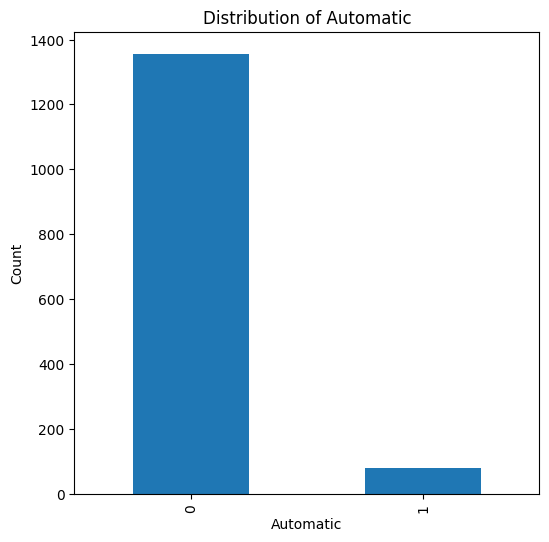

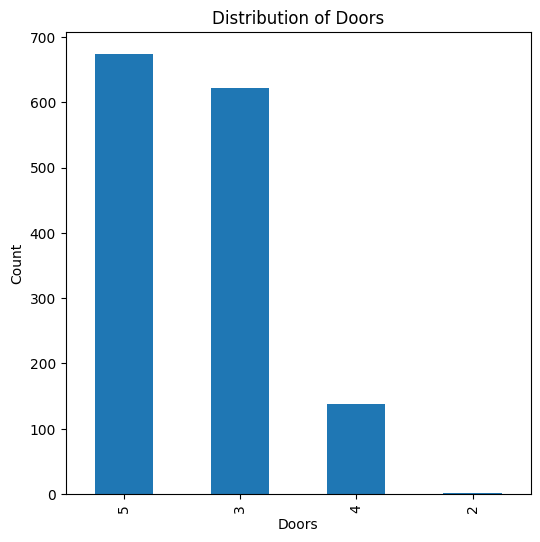

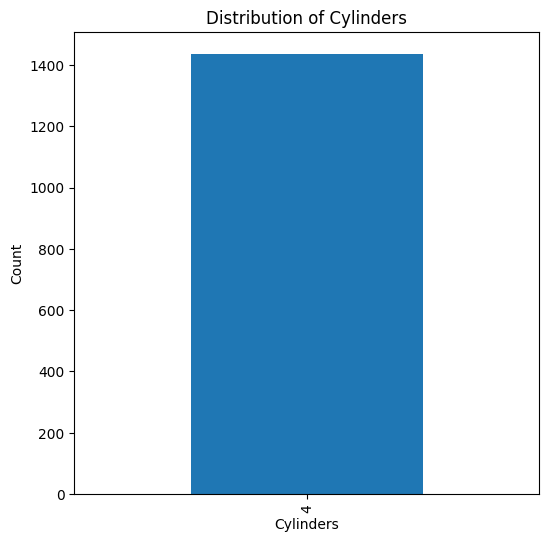

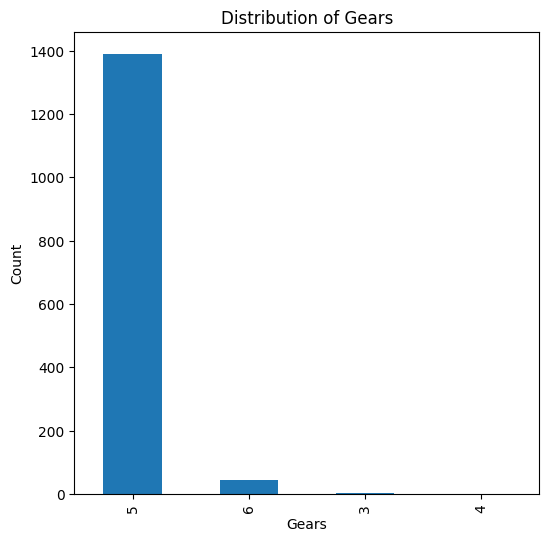

In [4]:
import matplotlib.pyplot as plt

# Select discrete variables
discrete_vars = ['Fuel_Type', 'Automatic', 'Doors', 'Cylinders', 'Gears']

# Plot bar graphs for discrete variables
for var in discrete_vars:
    plt.figure(figsize=(6, 6))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

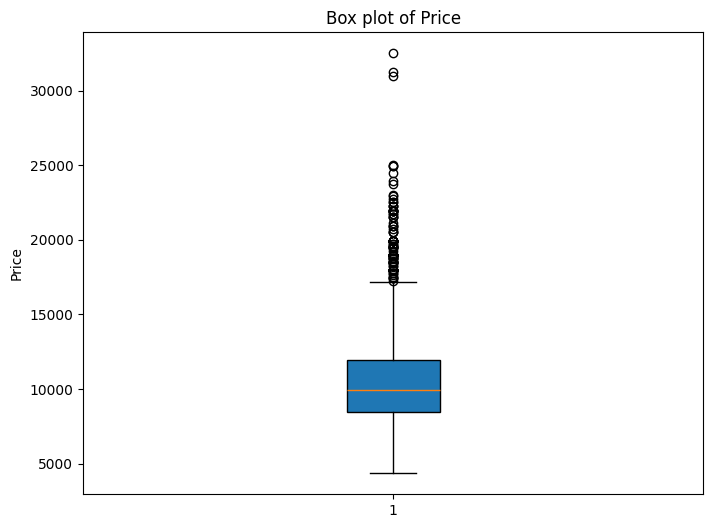

Outliers for Price:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
182,21125,2,225,Petrol,97,0,1400,5,4,5,1110
183,21500,2,15,Petrol,110,0,1600,5,4,5,1130
184,17795,1,1,Petrol,98,0,1400,4,4,5,1100
185,18245,1,1,Petrol,110,0,1600,5,4,5,1075


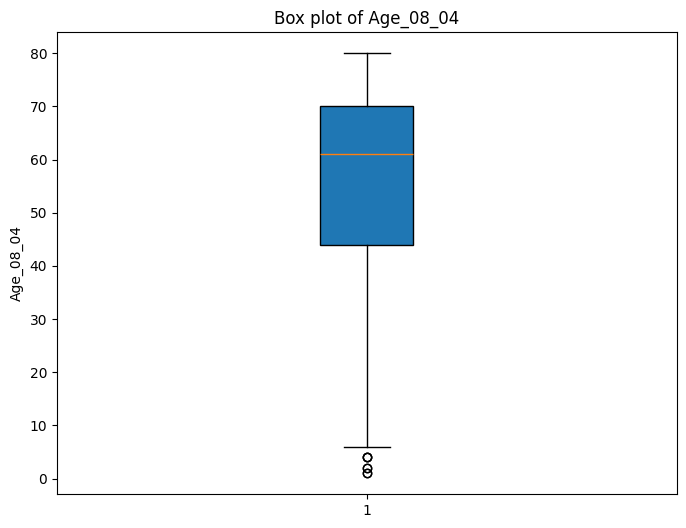

Outliers for Age_08_04:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,32500,4,1,Diesel,116,0,2000,5,4,5,1480
110,31000,4,4000,Diesel,116,0,2000,5,4,5,1480
111,31275,4,1500,Diesel,116,0,2000,5,4,5,1480
182,21125,2,225,Petrol,97,0,1400,5,4,5,1110
183,21500,2,15,Petrol,110,0,1600,5,4,5,1130
184,17795,1,1,Petrol,98,0,1400,4,4,5,1100
185,18245,1,1,Petrol,110,0,1600,5,4,5,1075


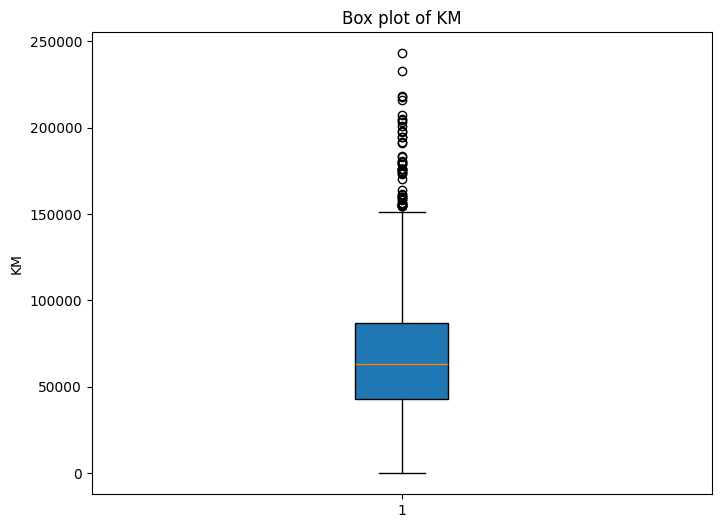

Outliers for KM:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
186,6950,43,243000,Diesel,69,0,1900,3,4,5,1110
187,9500,38,180638,Diesel,90,0,2000,4,4,5,1160
188,11950,40,179860,Diesel,90,0,2000,5,4,5,1205
189,7750,43,178858,CNG,110,0,1600,3,4,5,1084
190,11950,40,161000,Diesel,69,0,1900,3,4,5,1105
191,4350,44,158320,Diesel,69,0,1800,5,4,5,1110
378,6500,53,216000,Diesel,69,0,1900,3,4,5,1110
379,6400,51,198167,Diesel,69,0,1900,4,4,5,1095
380,7000,53,176000,Diesel,69,0,1900,3,4,5,1105
381,7750,54,174139,Diesel,72,0,2000,4,4,5,1100


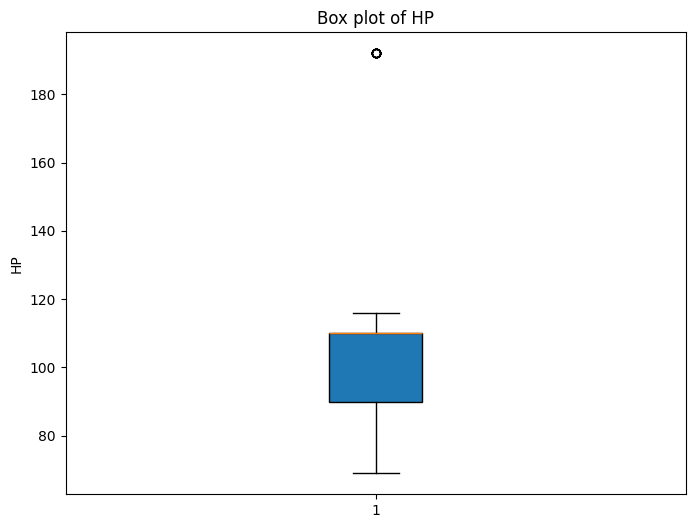

Outliers for HP:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
13,21500,31,23000,Petrol,192,0,1800,3,4,6,1185
14,22500,32,34131,Petrol,192,0,1800,3,4,6,1185
15,22000,28,18739,Petrol,192,0,1800,3,4,6,1185
16,22750,30,34000,Petrol,192,0,1800,3,4,5,1185
49,21950,31,64982,Petrol,192,0,1800,5,4,6,1195
53,21950,27,49866,Petrol,192,0,1800,5,4,5,1195


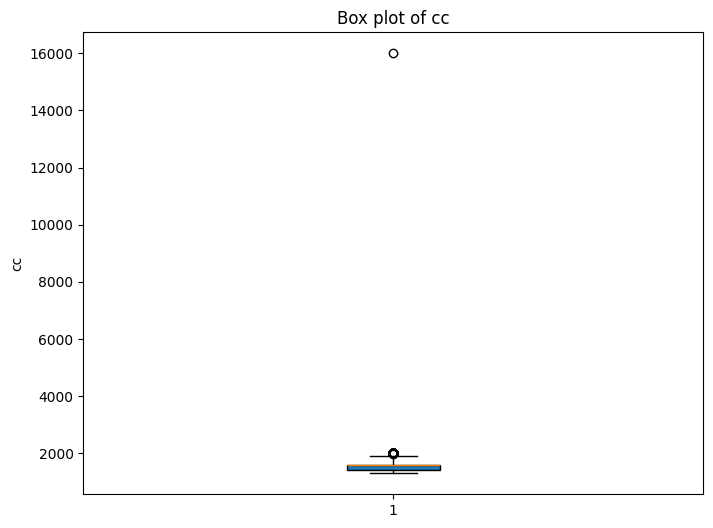

Outliers for cc:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1195,8750,74,89800,Diesel,72,0,2000,3,4,5,1115
1202,6950,73,88186,Diesel,72,0,2000,3,4,5,1115
1216,8500,70,85864,Diesel,72,0,2000,5,4,5,1135
1320,9400,69,67092,Diesel,72,0,2000,3,4,5,1115


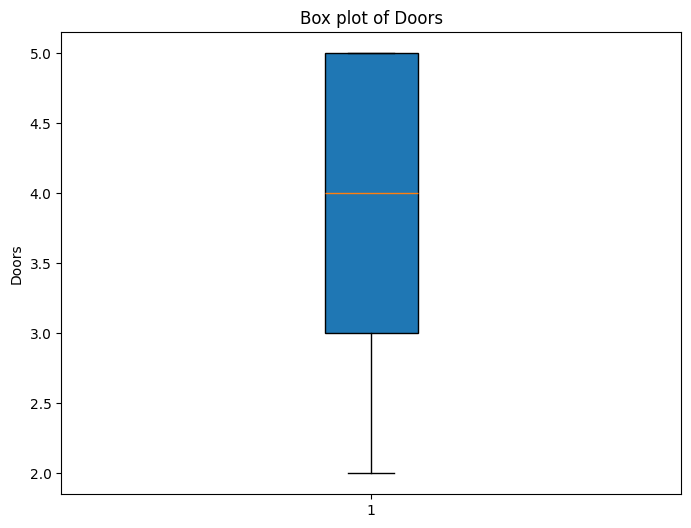

Outliers for Doors:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


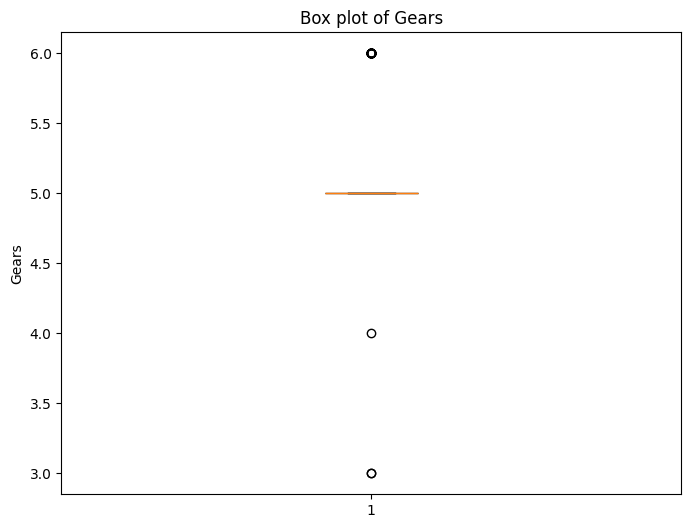

Outliers for Gears:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
13,21500,31,23000,Petrol,192,0,1800,3,4,6,1185
14,22500,32,34131,Petrol,192,0,1800,3,4,6,1185
15,22000,28,18739,Petrol,192,0,1800,3,4,6,1185
49,21950,31,64982,Petrol,192,0,1800,5,4,6,1195
330,11000,41,33000,Petrol,110,1,1600,5,4,6,1075
444,11750,48,75045,Petrol,110,0,1600,3,4,6,1055
461,11950,49,69659,Petrol,86,0,1300,3,4,6,1025


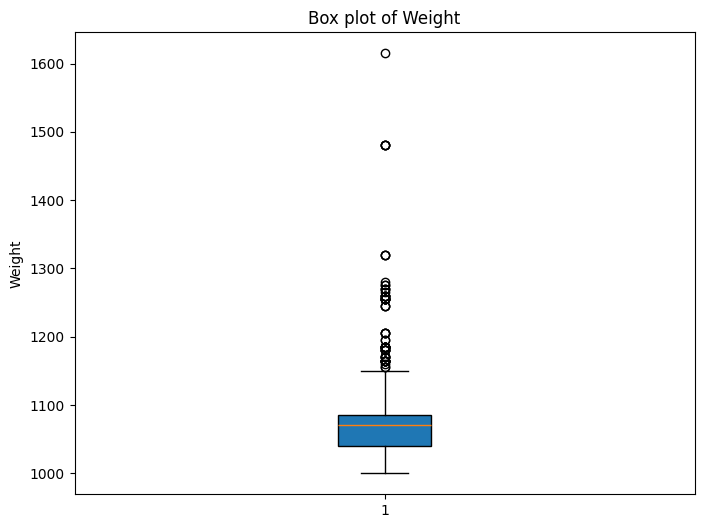

Outliers for Weight:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
601,7500,50,1,Diesel,90,0,2000,3,4,5,1260
654,6950,65,114383,Diesel,90,0,2000,3,4,5,1260
768,10950,59,78750,Diesel,90,0,1975,5,4,5,1155
960,9390,66,50806,Petrol,86,0,1300,3,4,5,1480


In [5]:
import matplotlib.pyplot as plt
import numpy as np

continuous_vars = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']

for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[var], patch_artist=True)
    plt.title(f'Box plot of {var}')
    plt.ylabel(var)
    plt.show()

    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Outliers for {var}:")
    display(outliers)

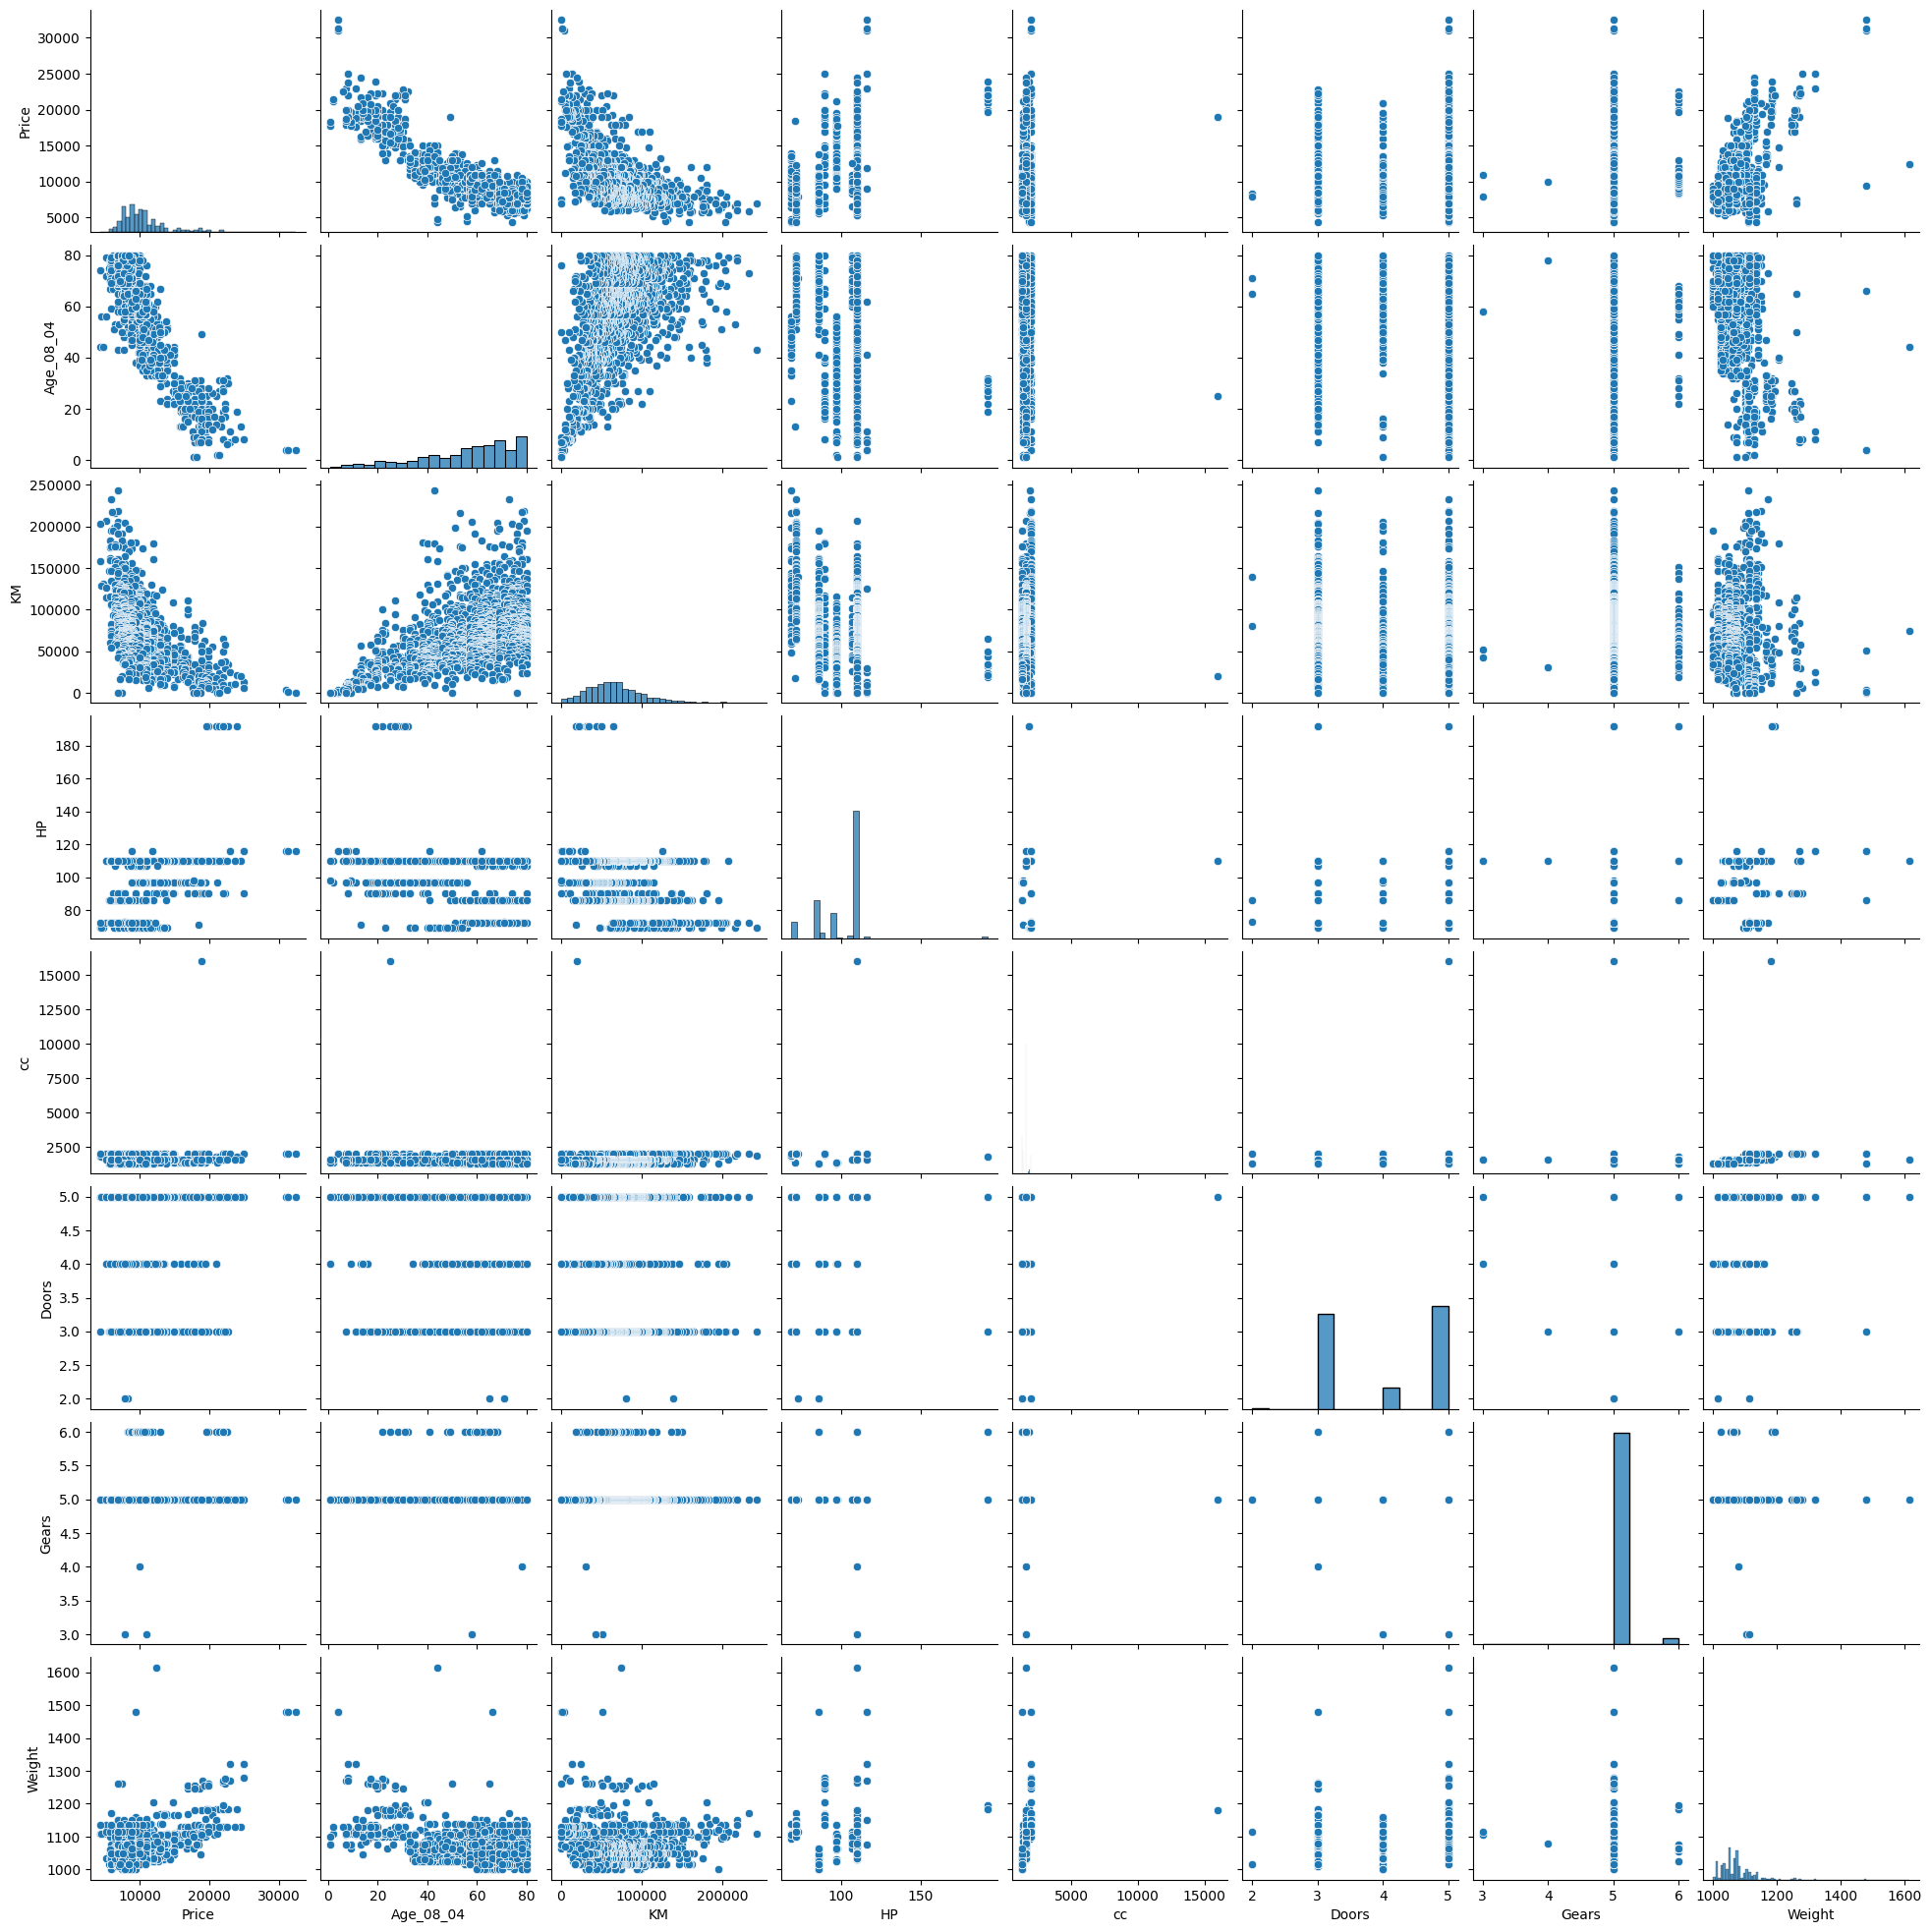

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous variables
continuous_vars = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']

# Create a pair plot of the continuous variables
sns.pairplot(df[continuous_vars])
plt.show()

In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Data cleaning/preprocessing

In [8]:
#handling missing values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [9]:
# Remove outliers based on the IQR method
df = df[(df['Price'] >= (df['Price'].quantile(0.25) - 1.5*(df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))) &
                (df['Price'] <= (df['Price'].quantile(0.75) + 1.5*(df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))) &
                (df['Age_08_04'] >= (df['Age_08_04'].quantile(0.25) - 1.5*(df['Age_08_04'].quantile(0.75) - df['Age_08_04'].quantile(0.25)))) &
                (df['Age_08_04'] <= (df['Age_08_04'].quantile(0.75) + 1.5*(df['Age_08_04'].quantile(0.75) - df['Age_08_04'].quantile(0.25)))) &
                (df['KM'] >= (df['KM'].quantile(0.25) - 1.5*(df['KM'].quantile(0.75) - df['KM'].quantile(0.25)))) &
                (df['KM'] <= (df['KM'].quantile(0.75) + 1.5*(df['KM'].quantile(0.75) - df['KM'].quantile(0.25)))) &
                (df['HP'] >= (df['HP'].quantile(0.25) - 1.5*(df['HP'].quantile(0.75) - df['HP'].quantile(0.25)))) &
                (df['HP'] <= (df['HP'].quantile(0.75) + 1.5*(df['HP'].quantile(0.75) - df['HP'].quantile(0.25)))) &
                (df['cc'] >= (df['cc'].quantile(0.25) - 1.5*(df['cc'].quantile(0.75) - df['cc'].quantile(0.25)))) &
                (df['cc'] <= (df['cc'].quantile(0.75) + 1.5*(df['cc'].quantile(0.75) - df['cc'].quantile(0.25)))) &
                (df['Doors'] >= (df['Doors'].quantile(0.25) - 1.5*(df['Doors'].quantile(0.75) - df['Doors'].quantile(0.25)))) &
                (df['Doors'] <= (df['Doors'].quantile(0.75) + 1.5*(df['Doors'].quantile(0.75) - df['Doors'].quantile(0.25)))) &
                (df['Gears'] >= (df['Gears'].quantile(0.25) - 1.5*(df['Gears'].quantile(0.75) - df['Gears'].quantile(0.25)))) &
                (df['Gears'] <= (df['Gears'].quantile(0.75) + 1.5*(df['Gears'].quantile(0.75) - df['Gears'].quantile(0.25)))) &
                (df['Weight'] >= (df['Weight'].quantile(0.25) - 1.5*(df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25)))) &
                (df['Weight'] <= (df['Weight'].quantile(0.75) + 1.5*(df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25))))
               ]
display(df.shape)

(1163, 11)

In [10]:
# Check for duplicate rows
print("Number of duplicate rows:",df.duplicated().sum())

# Check for null values
print("Number of null values per column:")
display(df.isnull().sum())

Number of duplicate rows: 0
Number of null values per column:


,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


Data Transformation

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1163 entries, 9 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1163 non-null   int64 
 1   Age_08_04  1163 non-null   int64 
 2   KM         1163 non-null   int64 
 3   Fuel_Type  1163 non-null   object
 4   HP         1163 non-null   int64 
 5   Automatic  1163 non-null   int64 
 6   cc         1163 non-null   int64 
 7   Doors      1163 non-null   int64 
 8   Cylinders  1163 non-null   int64 
 9   Gears      1163 non-null   int64 
 10  Weight     1163 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 109.0+ KB


In [12]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Fuel_Type"]=le.fit_transform(df["Fuel_Type"])
df

/tmp/ipython-input-16235750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fuel_Type"]=le.fit_transform(df["Fuel_Type"])


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,1,69,0,1900,3,4,5,1105
18,16750,24,25563,2,110,0,1600,3,4,5,1065
19,16950,30,64359,2,110,0,1600,3,4,5,1105
20,15950,30,67660,2,110,0,1600,3,4,5,1105
22,15950,28,56349,2,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


Data Partition

In [13]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.865013,-0.524801,-0.021295,0.123336,-0.008234,0.119779,0.174688,NaN,NaN,0.462803
Age_08_04,-0.865013,1.000000,0.455748,0.103195,-0.010641,0.089895,-0.082642,-0.106906,NaN,NaN,-0.370365
KM,-0.524801,0.455748,1.000000,-0.241741,-0.045213,-0.034678,0.134642,0.020026,NaN,NaN,-0.029589
Fuel_Type,-0.021295,0.103195,-0.241741,1.000000,0.205861,0.042647,-0.289000,-0.046092,NaN,NaN,-0.323055
HP,0.123336,-0.010641,-0.045213,0.205861,1.000000,-0.041086,0.616083,0.167108,NaN,NaN,0.321183
Automatic,-0.008234,0.089895,-0.034678,0.042647,-0.041086,1.000000,-0.044144,-0.057202,NaN,NaN,0.108218
cc,0.119779,-0.082642,0.134642,-0.289000,0.616083,-0.044144,1.000000,0.212051,NaN,NaN,0.614787
Doors,0.174688,-0.106906,0.020026,-0.046092,0.167108,-0.057202,0.212051,1.000000,NaN,NaN,0.521794
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#define features and target
X=df.drop("Price",axis=1)
Y=df["Price"]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

Model fitting

Model-1: Including all features

In [42]:
#Standardize and apply Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lr_pipeline_model1 = make_pipeline(StandardScaler(), LinearRegression())
lr_pipeline_model1.fit(X_train, Y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Evaluating metrics

In [43]:
Y_train_pred = lr_pipeline_model1.predict(X_train)
Y_test_pred = lr_pipeline_model1.predict(X_test)

from sklearn.metrics import r2_score
print("Linear Regression Model-1:")
print("Train R²:",np.round(r2_score(Y_train, Y_train_pred),2))
print("Test R² :", np.round(r2_score(Y_test, Y_test_pred),2))

Linear Regression Model-1:
Train R²: 0.81
Test R² : 0.83


Cross Validation

In [44]:
# Step 6: Apply ShuffleSplit Cross-Validation
from sklearn.model_selection import ShuffleSplit, cross_val_score

shuffle_split = ShuffleSplit(n_splits=100, test_size=0.2)
cv_scores = cross_val_score(lr_pipeline_model1, X, Y, cv=shuffle_split, scoring='r2')
print("Average model-1 CV R²:", np.round(cv_scores.mean(),2))

Average model-1 CV R²: 0.81


Model-2

In [46]:
#calculating vif for all the feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF values for each feature:")
display(vif_data.sort_values(by='VIF', ascending=False))

# Print coefficients from the initial linear regression model
print("\nCoefficients from the initial Linear Regression model:")
coefficients = lr_pipeline.named_steps['linearregression'].coef_
feature_names = X.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

VIF values for each feature:


,Feature,VIF
5,cc,339.719556
7,Weight,339.050237
3,HP,193.273683
2,Fuel_Type,82.996723
6,Doors,21.974641
0,Age_08_04,21.122279
1,KM,9.618792
4,Automatic,1.090309



Coefficients from the initial Linear Regression model:
Age_08_04: -1669.1080
KM: -363.2787
Fuel_Type: 117.7320
HP: 233.8226
Automatic: 52.7907
cc: -252.0074
Doors: -56.1948
Weight: 0.0000


In [35]:
# Remove the identified weak features ('Cylinders' and 'Gears') from the DataFrame
df_reduced = df.drop(columns=['Cylinders', 'Gears'])

# Print the columns of the new DataFrame to confirm the removal
print("Columns in the reduced DataFrame:")
print(df_reduced.columns)

# Display the head of the reduced DataFrame
display(df_reduced.head())


Columns in the reduced DataFrame:
Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Weight'],
      dtype='object')


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Weight
9,12950,23,71138,1,69,0,1900,3,1105
18,16750,24,25563,2,110,0,1600,3,1065
19,16950,30,64359,2,110,0,1600,3,1105
20,15950,30,67660,2,110,0,1600,3,1105
22,15950,28,56349,2,110,0,1600,3,1120


the VIF (Variance Inflation Factor) for these features was calculated as 0, and their coefficients in the initial linear regression model were also extremely close to zero. This suggests that these features have no variance and are not contributing any meaningful information to the model, so removing them simplifies the model without significantly impacting its performance.

developing another model after removing those features and spliting the data again.

Model-3

In [36]:
# Define the features (X) and target variable (Y) using the df_reduced DataFrame
X = df_reduced.drop("Price", axis=1)
Y = df_reduced["Price"]

# Split the X and Y data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (930, 8)
Shape of X_test: (233, 8)
Shape of Y_train: (930,)
Shape of Y_test: (233,)


i fitted the model and calculated the metrics

In [40]:
lr_pipeline_model3 = make_pipeline(StandardScaler(), LinearRegression())
lr_pipeline_model3.fit(X_train, Y_train)

Y_train_pred_model3 = lr_pipeline_model3.predict(X_train)
Y_test_pred_model3 = lr_pipeline_model3.predict(X_test)

print("Linear Regression after(model-3) removing weak features:")
print("Train R²:", np.round(r2_score(Y_train, Y_train_pred_model3), 2))
print("Test R² :", np.round(r2_score(Y_test, Y_test_pred_model3), 2))

Linear Regression after(model-3) removing weak features:
Train R²: 0.81
Test R² : 0.83


applied shuffle cross validation for the model

In [45]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Instantiate ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# Use cross_val_score with lr_pipeline_model2
cv_scores_model3 = cross_val_score(lr_pipeline_model3, X, Y, cv=shuffle_split, scoring='r2')

# Print the average of the cross-validation scores
print("Average CV R² for Model 3:", np.round(cv_scores_model3.mean(), 2))

Average CV R² for Model 3: 0.81


Lasso and Ridge methods

In [23]:
from sklearn.linear_model import Lasso, Ridge

In [24]:
#Apply LassoCV to find optimal alpha
from sklearn.linear_model import Lasso, LassoCV

lasso_cv_pipeline = make_pipeline(StandardScaler(), LassoCV(cv=5, max_iter=10000,alphas = None))
lasso_cv_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(cv=5, max_iter=10000))])

In [25]:
print("All alphas tried by LassoCV:", lasso_cv_pipeline.named_steps['lassocv'].alphas_)

All alphas tried by LassoCV: [2000.13318621 1865.33090367 1739.61384381 1622.36969302 1513.02740559
 1411.05442238 1315.95407694 1227.2631765  1144.54974591 1067.41092371
  995.47099995  928.37958628  865.80990935  807.45721922  753.03730511
  702.28511107  654.95344505  610.81177491  569.6451056   531.25293201
  495.44826244  462.05670776  430.9156321   401.87336073  374.78844124
  349.52895467  325.97187296  304.00245971  283.51371139  264.40583613
  246.58576771  229.96671226  214.46772552  200.01331862  186.53309037
  173.96138438  162.2369693   151.30274056  141.10544224  131.59540769
  122.72631765  114.45497459  106.74109237   99.5471       92.83795863
   86.58099093   80.74572192   75.30373051   70.22851111   65.49534451
   61.08117749   56.96451056   53.1252932    49.54482624   46.20567078
   43.09156321   40.18733607   37.47884412   34.95289547   32.5971873
   30.40024597   28.35137114   26.44058361   24.65857677   22.99667123
   21.44677255   20.00133186   18.65330904   17.3

In [26]:
# Extract best alpha
best_alpha = lasso_cv_pipeline.named_steps['lassocv'].alpha_
print("Best alpha from LassoCV:", best_alpha)

Best alpha from LassoCV: 2.0001331862057743


In [27]:
# Extract coefficients from the Lasso model
lasso_coefficients = lasso_cv_pipeline.named_steps['lassocv'].coef_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to show coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

# Identify features with coefficients close to zero (due to floating point precision)
zero_coef_features = coefficients_df[abs(coefficients_df['Coefficient']) < 1e-9]['Feature'].tolist()

print("Features with coefficients shrunk to zero by Lasso:")
print(zero_coef_features)

# Remove identified features from the DataFrame X
X = X.drop(columns=zero_coef_features)

print("\nDataFrame X after removing features:")
display(X.head())

Features with coefficients shrunk to zero by Lasso:
[]

DataFrame X after removing features:


,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Weight
9,23,71138,1,69,0,1900,3,1105
18,24,25563,2,110,0,1600,3,1065
19,30,64359,2,110,0,1600,3,1105
20,30,67660,2,110,0,1600,3,1105
22,28,56349,2,110,0,1600,3,1120


In [28]:
# Split the data again after removing features
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

# Re-fit the LassoCV model with the updated data
lasso_cv_pipeline.fit(X_train, Y_train)

# Re-evaluate the performance
Y_train_lasso = lasso_cv_pipeline.predict(X_train)
Y_test_lasso = lasso_cv_pipeline.predict(X_test)
print("LassoCV Train R² after removing features:", np.round(r2_score(Y_train, Y_train_lasso),2))
print("LassoCV Test R² after removing features :", np.round(r2_score(Y_test, Y_test_lasso),2))

LassoCV Train R² after removing features: 0.81
LassoCV Test R² after removing features : 0.83


In [29]:
# Step 8: Plot alpha vs CV error
mse_path = lasso_cv_pipeline.named_steps['lassocv'].mse_path_.mean(axis=1)
alphas_tested = lasso_cv_pipeline.named_steps['lassocv'].alphas_
alphas_tested

array([2000.13318621, 1865.33090367, 1739.61384381, 1622.36969302,
       1513.02740559, 1411.05442238, 1315.95407694, 1227.2631765 ,
       1144.54974591, 1067.41092371,  995.47099995,  928.37958628,
        865.80990935,  807.45721922,  753.03730511,  702.28511107,
        654.95344505,  610.81177491,  569.6451056 ,  531.25293201,
        495.44826244,  462.05670776,  430.9156321 ,  401.87336073,
        374.78844124,  349.52895467,  325.97187296,  304.00245971,
        283.51371139,  264.40583613,  246.58576771,  229.96671226,
        214.46772552,  200.01331862,  186.53309037,  173.96138438,
        162.2369693 ,  151.30274056,  141.10544224,  131.59540769,
        122.72631765,  114.45497459,  106.74109237,   99.5471    ,
         92.83795863,   86.58099093,   80.74572192,   75.30373051,
         70.22851111,   65.49534451,   61.08117749,   56.96451056,
         53.1252932 ,   49.54482624,   46.20567078,   43.09156321,
         40.18733607,   37.47884412,   34.95289547,   32.59718

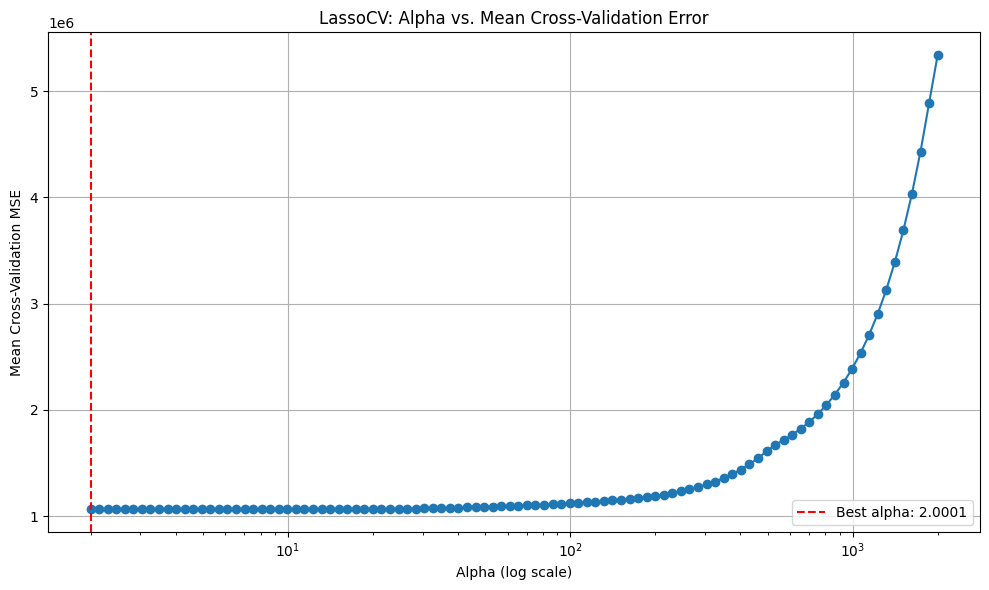

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(alphas_tested, mse_path, marker='o')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best alpha: {best_alpha:.4f}')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Cross-Validation MSE')
plt.title('LassoCV: Alpha vs. Mean Cross-Validation Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
#Apply ridge cv to find optimal alpha
from sklearn.linear_model import Ridge, RidgeCV
ridge_cv_pipeline = make_pipeline(StandardScaler(), RidgeCV(cv=5, alphas=(0.1, 1.0, 10.0)))
ridge_cv_pipeline.fit(X_train, Y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(cv=5))])

In [32]:
print("All alphas tried by RidgeCV:", ridge_cv_pipeline.named_steps['ridgecv'].alphas)

All alphas tried by RidgeCV: (0.1, 1.0, 10.0)


In [33]:
#extract the best alpha
best_alpha_ridge = ridge_cv_pipeline.named_steps['ridgecv'].alpha_
print("Best alpha from RidgeCV:", best_alpha_ridge)

Best alpha from RidgeCV: 10.0


In [34]:
# Extract coefficients from the Ridge model
ridge_coefficients = ridge_cv_pipeline.named_steps['ridgecv'].coef_

# Get the names of the features (from the updated X)
feature_names_updated = X_train.columns

# Create a DataFrame to show coefficients
ridge_coefficients_df = pd.DataFrame({'Feature': feature_names_updated, 'Coefficient': ridge_coefficients})

# Identify features with coefficients close to zero (due to floating point precision)
zero_coef_features_ridge = ridge_coefficients_df[abs(ridge_coefficients_df['Coefficient']) < 1e-9]['Feature'].tolist()

print("Features with coefficients shrunk to zero by Ridge:")
print(zero_coef_features_ridge)

# Remove identified features from the DataFrame X (if any are found)
# Note: Ridge tends not to shrink coefficients completely to zero like Lasso
if zero_coef_features_ridge:
    X = X.drop(columns=zero_coef_features_ridge)
    print("\nDataFrame X after removing features identified by Ridge:")
    display(X.head())
else:
    print("\nNo features had coefficients shrunk to zero by Ridge.")

# Split the data again after potentially removing more features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Re-fit the RidgeCV model with the updated data
ridge_cv_pipeline.fit(X_train, Y_train)

# Re-evaluate the performance
Y_train_ridge = ridge_cv_pipeline.predict(X_train)
Y_test_ridge = ridge_cv_pipeline.predict(X_test)
print("\nRidgeCV Train R² after removing features:", np.round(r2_score(Y_train, Y_train_ridge),2))
print("RidgeCV Test R² after removing features :", np.round(r2_score(Y_test, Y_test_ridge),2))

Features with coefficients shrunk to zero by Ridge:
[]

No features had coefficients shrunk to zero by Ridge.

RidgeCV Train R² after removing features: 0.81
RidgeCV Test R² after removing features : 0.83


Conclusion:

Tasks Accomplished:
1) I have loaded the dataset into my machine.

2) Performed the EDA to gain insights and visualize the data to find the behaviour of the continuous and categorical variables and statistic summary of the variables is determined.

3) Removed the outliers in he data cleaning/preprocessing step.

4) Divided the data into features in 'X' and target variable in 'Y' and then partitioned the data into training(80%) and testing(20%).

5) I built first a linear regression model using all the X variables,interpreted their coefficients,evaluated the performance of the model using various metrics and also perform shuffle split cross validation on that model.

6) Then I built a second model which identified the weakest features using VIF and low coefficient impact.

7) I built the third model by removing the featues whose VIF is zero and has no variance and calculated the metrics and also applied shuffle split cross validation.

 Later I had built another model using lasso method by removing the variables whose coefficients are shrunk to zero using alpha value and then evaluated the model.

 At final I had built another model using ridge method and evaluated the model.

Key takeaways and findings:

All the three models gave me same training r2 score and testing r2 score.


Linear Regression Model-1:

Train R²: 0.81

Test R² : 0.83

Average CV R²: 0.81

Linear Regression after(model-3) removing weak features:

Train R²: 0.81

Test R² : 0.83

Lasso model:

LassoCV Train R² after removing features: 0.81

LassoCV Test R² after removing features : 0.83

Ridge model:

RidgeCV Train R² after removing features: 0.81

RidgeCV Test R² after removing features : 0.83

Here all the models have shown almost the same scores,through VIF calculations I removed cylinder and gears features and built a model again and also through lasso method we removed the same features,hence I noticed that these two features are not neccessary for the model development.